# Visualizing Flight Delays and Building a Predictive Model:

In this project, we'll be working with a dataset of flight records to explore and analyze flight delays in the United States. We'll start by visualizing the data to gain some initial insights and then build a machine learning model to predict the probability of a flight being delayed. We'll use this model to analyze the impact of different features on flight delays and identify the most significant predictors. Finally, we'll explore various visualization techniques to help us understand the relationships between these predictors and flight delays. By the end of this project, we should have a better understanding of the factors that contribute to flight delays and some insights into how we might be able to mitigate their impact.







---



# The dataset:
The dataset used in this project can be downloaded from the following link: https://github.com/roberthryniewicz/datasets/tree/master/airline-dataset/flights. It contains flight records from various airlines in the United States, including details such as departure and arrival times, carrier information, and delay status. This dataset provides a rich source of information that we can use to explore and analyze the factors that contribute to flight delays. With this information, we can develop strategies to improve the efficiency and reliability of air travel and mitigate the negative impact of delays on both passengers and airlines.






Let's first read and visualise the data:

In [ ]:
import pandas as pd
data=pd.read_csv('/content/flights.csv')
data.head

<bound method NDFrame.head of        Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      1           3          4   2003.0        1955   2211.0   
1      2008      1           3          4    754.0         735   1002.0   
2      2008      1           3          4    628.0         620    804.0   
3      2008      1           3          4    926.0         930   1054.0   
4      2008      1           3          4   1829.0        1755   1959.0   
...     ...    ...         ...        ...      ...         ...      ...   
99995  2008      1          25          5   2204.0        1935    106.0   
99996  2008      1          26          6   1933.0        1935   2234.0   
99997  2008      1          27          7   2047.0        1935   2400.0   
99998  2008      1          28          1   1956.0        1935   2308.0   
99999  2008      1          29          2   1938.0        1935   2308.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Canc

Let's print the components of the data, or the names of the columns

In [ ]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
data.shape

(100000, 29)

The code below plots a histogram of arrival delays for a given dataset and displays the frequency of delays in terms of the number of flights. The histogram helps visualize the distribution of arrival delays and the frequency of different delay durations.






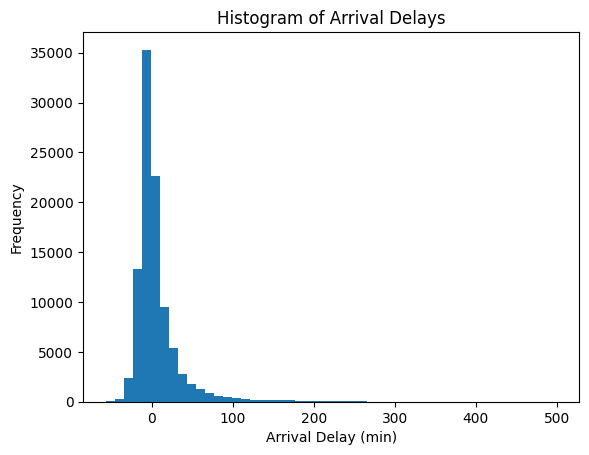

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of arrival delays
plt.hist(data['ArrDelay'], bins=50)
plt.xlabel('Arrival Delay (min)')
plt.ylabel('Frequency')
plt.title('Histogram of Arrival Delays')
plt.show()


The following code creates a bar chart that shows the number of flights for each carrier in the dataset, using the seaborn library. It uses the value_counts() method to count the number of flights for each carrier, and then creates a bar plot using the resulting data.






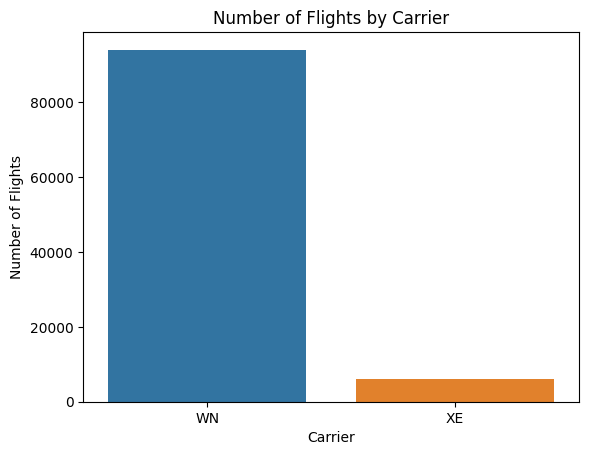

In [ ]:
import seaborn as sns

# Count the number of flights by carrier
carrier_counts = data['UniqueCarrier'].value_counts()

# Create a bar chart of the number of flights by carrier
sns.barplot(x=carrier_counts.index, y=carrier_counts.values)
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Carrier')
plt.show()


This code creates a box plot that shows the distribution of arrival delays for each day of the week, allowing us to compare the median, quartiles, and outliers of each day.



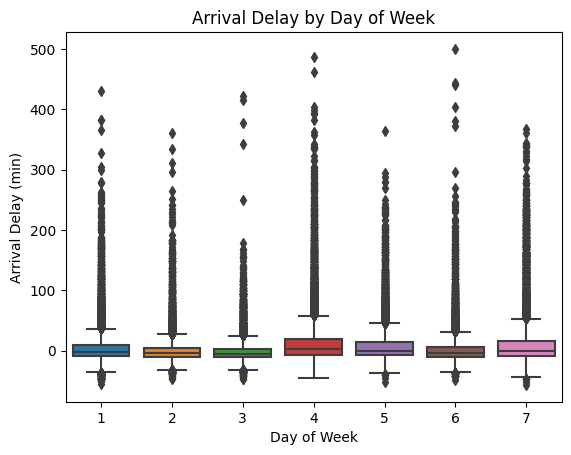

In [ ]:
# Create a box plot of arrival delays by day of week
sns.boxplot(x=data['DayOfWeek'], y=data['ArrDelay'])
plt.xlabel('Day of Week')
plt.ylabel('Arrival Delay (min)')
plt.title('Arrival Delay by Day of Week')
plt.show()


This following code calculates the correlation matrix of the dataset and creates a heatmap visualization of it, where each cell represents the correlation between two features, with warmer colors indicating higher positive correlations and cooler colors indicating higher negative correlations.

<ipython-input-74-ad650fc17080>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


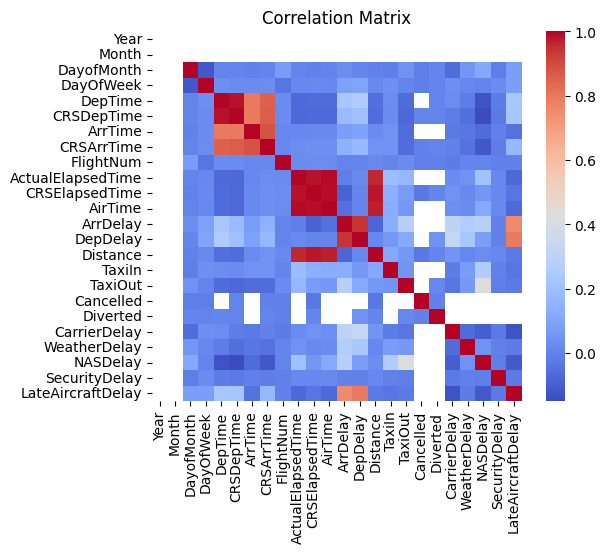

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, square=True)
plt.title('Correlation Matrix')
plt.show()


# Building a Machine Learning Model to Predict Flight Delays with Random Forest Classifier
The overall goal of this code is to train a machine learning model to predict whether a flight will be delayed or not based on various features such as airline carrier, origin and destination airports, month, day of week, departure time, and distance traveled. It uses a random forest classifier to make these predictions and evaluates the accuracy of the model using the test data.

The steps to build this code are: 
 

*   Import the necessary libraries, including pandas, scikit-learn,and the necessary modules from those libraries.
*  Load the flight data into a pandas DataFrame.
*   Remove unnecessary columns from the DataFrame.
*   Split the DataFrame into features and target variables, with the target variable being whether or not the flight arrived late.
*   Define a ColumnTransformer to preprocess the data, including handling missing values, encoding categorical variables, and scaling numeric variables.
*   Apply the preprocessing pipeline to the features DataFrame.
*   Split the preprocessed data into training and testing sets.
*   Train a random forest classifier on the training data.
*  Use the trained model to make predictions on the testing data.
*   Evaluate the model's accuracy on the testing data and print the result.


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransforme
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('/content/flights.csv')

# Drop unnecessary columns
data = data.drop(['FlightNum', 'TailNum', 'CancellationCode'], axis=1)

# Split the data into features and target
X = data.drop(['ArrDelay'], axis=1)
y = data['ArrDelay'].apply(lambda x: 1 if x > 0 else 0)

# Define the column transformer
cat_cols = ['UniqueCarrier', 'Origin', 'Dest']
num_cols = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'Distance']
cat_transformer = ColumnTransformer([('onehot', OneHotEncoder(), cat_cols)], remainder='passthrough')
preprocessor = ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'), num_cols),
                                                ('cat', cat_transformer, cat_cols)])

# Apply the preprocessing pipeline to the data
X = preprocessor.fit_transform(X)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7212333333333333


# Pipeline for Predicting Flight Delay Probability with Random Forest Classifier.
The overall goal of this part is to build a machine learning model that can predict the probability of a flight being delayed based on various features such as carrier, origin, destination, departure time, and distance. 

The code loads flight data from the CSV file, preprocesses the data, trains a random forest classifier on the preprocessed data, and defines a function to predict the delay probability for a given flight.










In [ ]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Load the data from the CSV file
data = pd.read_csv("/content/flights.csv")

# Define the input features and the target variable
X = data.drop("ArrDelay", axis=1)
y = data["ArrDelay"].fillna(0).apply(lambda x: 1 if x > 15 else 0)

# Define the pre-processing steps for the input features
categorical_features = ["UniqueCarrier", "TailNum", "Origin", "Dest", "CancellationCode"]
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
numerical_features = ["Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime", 
                      "ArrTime", "CRSArrTime", "FlightNum", "ActualElapsedTime", "CRSElapsedTime",
                      "AirTime", "Distance", "TaxiIn", "TaxiOut", "Cancelled", "Diverted",
                      "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]
numerical_transformer = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)
preprocessor = make_column_transformer(
    (categorical_transformer, categorical_features),
    (numerical_transformer, numerical_features)
)

# Define the random forest classifier
rf = RandomForestClassifier()

# Define the pipeline
pipeline = make_pipeline(preprocessor, rf)

# Train the model
pipeline.fit(X, y)

# Define a function to predict the delay
def predict_delay(flight):
    # Convert the input to a DataFrame
    X = pd.DataFrame([flight])
    # Predict the delay probability
    delay_prob = pipeline.predict_proba(X)[:, 1][0]
    return delay_prob



Test it on an example:

In [ ]:
def test_predict_delay():
    # Define a test flight
    flight = {'Year': 2019,
              'Month': 1,
              'DayofMonth': 1,
              'DayOfWeek': 2,
              'DepTime': 800,
              'CRSDepTime': 755,
              'ArrTime': 1000,
              'CRSArrTime': 955,
              'UniqueCarrier': 'AA',
              'FlightNum': 100,
              'TailNum': 'N12345',
              'ActualElapsedTime': 180,
              'CRSElapsedTime': 180,
              'AirTime': 150,
              'ArrDelay': 5,
              'DepDelay': 5,
              'Origin': 'ORD',
              'Dest': 'LAX',
              'Distance': 1745,
              'TaxiIn': 10,
              'TaxiOut': 15,
              'Cancelled': 0,
              'CancellationCode': '',
              'Diverted': 0,
              'CarrierDelay': 0,
              'WeatherDelay': 0,
              'NASDelay': 0,
              'SecurityDelay': 0,
              'LateAircraftDelay': 0}

    # Call the function to get the delay probability
    delay_prob = predict_delay(flight)

    # Check that the output is a float between 0 and 1
    assert isinstance(delay_prob, float)
    assert 0 <= delay_prob <= 1

    # Print the delay probability
    print(f"The predicted delay probability is {delay_prob:.2f}")
test_predict_delay()

The predicted delay probability is 0.48


**Another predicting function using less features : Given the flight number , we will output its delay probability**

In [ ]:
def predict_delay(flight_num):
    # Look up the flight's details in the DataFrame
    flight = data[data['FlightNum']==flight_num].iloc[0]
    # Convert the input to a DataFrame
    X = pd.DataFrame([flight])
    # Predict the delay probability
    delay_prob = pipeline.predict_proba(X)[:, 1][0]
    return delay_prob


In [ ]:
flight_num = 7676
delay_prob = predict_delay(flight_num)
print(delay_prob)


0.03


The goal of this code is to identify the flight numbers of the delayed flights in the dataset.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/flights.csv")

# Filter for delayed flights
delayed_flights = df[df['ArrDelay'] > 0]

# Extract the flight numbers
delayed_flight_numbers = delayed_flights['FlightNum'].unique()

# Print the flight numbers
print(delayed_flight_numbers)


[3231  448 3920 ... 7673 7674 7676]


Let's print the delayed_flights:

In [ ]:
delayed_flights = data[data['ArrDelay']>0]
print(delayed_flights)


       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
1      2008      1           3          4    754.0         735   1002.0   
2      2008      1           3          4    628.0         620    804.0   
4      2008      1           3          4   1829.0        1755   1959.0   
5      2008      1           3          4   1940.0        1915   2121.0   
6      2008      1           3          4   1937.0        1830   2037.0   
...     ...    ...         ...        ...      ...         ...      ...   
99994  2008      1          24          4   1950.0        1935   2332.0   
99995  2008      1          25          5   2204.0        1935    106.0   
99997  2008      1          27          7   2047.0        1935   2400.0   
99998  2008      1          28          1   1956.0        1935   2308.0   
99999  2008      1          29          2   1938.0        1935   2308.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
1            1000    

The goal of this code is to create a subset of the original dataset, including only the columns 'FlightNum' and 'ArrDelay'. Then it prints out the number of delayed flights and on-time flights based on the subsetted data.






In [ ]:
relevant_cols = ['FlightNum', 'ArrDelay']

# Subset the data to only include the relevant columns
data_subset = data[relevant_cols]

print("Number of delayed flights:", sum(data_subset['ArrDelay'] > 0))
print("Number of on-time flights:", sum(data_subset['ArrDelay'] <= 0))


Number of delayed flights: 41555
Number of on-time flights: 57143


# Visualisation of the results: 
Here we aim to visualize the distribution of the delay probabilities using a histogram. The predict_delay_vectorized function uses vectorized operations to predict the delay probabilities for all flights with the given flight numbers. The predicted probabilities are added to the original DataFrame, and a histogram is plotted to show the distribution of these probabilities.

<ipython-input-67-b7ff652e9885>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['DelayProb'] = probs_delayed


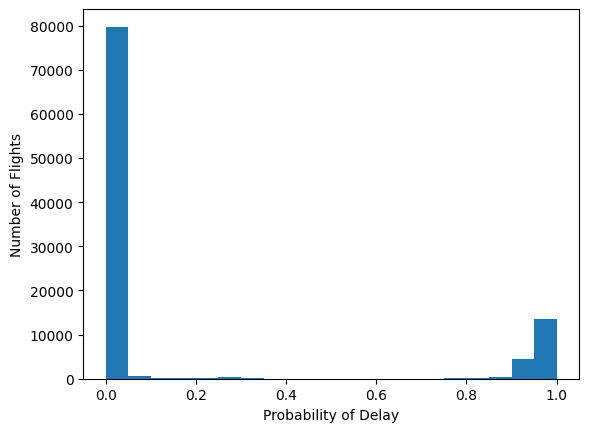

In [ ]:
def predict_delay_vectorized(flight_nums):
    # Convert the input to a DataFrame
    X = data[data['FlightNum'].isin(flight_nums)]
    # Predict the delay probabilities for all flights
    delay_probs = pipeline.predict_proba(X)[:, 1]
    return delay_probs

# Select relevant columns for the analysis
relevant_cols = ['FlightNum', 'ArrDelay']

# Subset the data to only include the relevant columns
data_subset = data[relevant_cols]

# Predict delays for all flights using vectorized operations
probs_delayed = predict_delay_vectorized(data_subset['FlightNum'])

# Add the predicted delay probabilities to the original DataFrame
data_subset['DelayProb'] = probs_delayed

# Print summary statistics
num_delayed = sum(data_subset['ArrDelay'] > 0)
num_ontime = sum(data_subset['ArrDelay'] <= 0)


# Visualize the distribution of delay probabilities
import matplotlib.pyplot as plt
plt.hist(data_subset['DelayProb'], bins=20)
plt.xlabel("Probability of Delay")
plt.ylabel("Number of Flights")
plt.show()


Number of delayed flights: 41555
Number of on-time flights: 57143


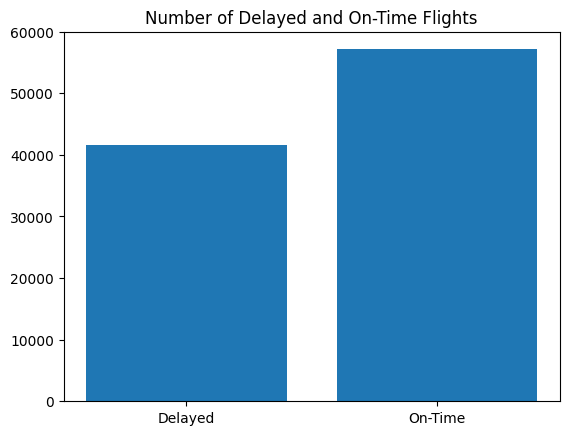

In [ ]:
# Count number of on-time flights
on_time_flights = len(data[data['ArrDelay'] <= 0])

# Print results
print("Number of delayed flights:", delayed_flights)
print("Number of on-time flights:", on_time_flights)

# Create bar plot
labels = ['Delayed', 'On-Time']
counts = [delayed_flights, on_time_flights]

plt.bar(labels, counts)
plt.title('Number of Delayed and On-Time Flights')
plt.show()


The code below generates a scatter plot that visualizes the relationship between the distance of a flight and the probability of a delay. The x-axis represents the distance in miles, and the y-axis represents the probability of delay for each flight, which is calculated using a machine learning model. The plot can help identify any patterns or trends in the data that could be used to improve the accuracy of the model.






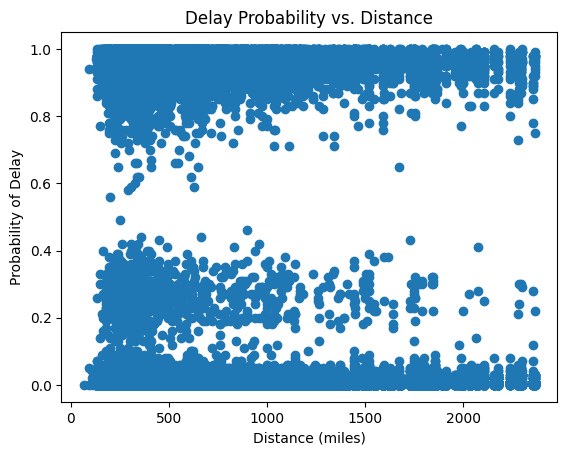

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['Distance'], probs_delayed)
plt.title('Delay Probability vs. Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Probability of Delay')
plt.show()


The code above generates a boxplot showing the probability of delay for each airline in the dataset, using the seaborn library. The x-axis represents the airline code and the y-axis represents the probability of delay.






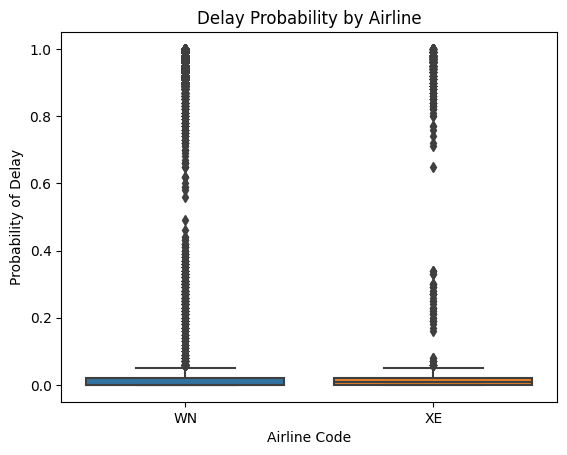

In [ ]:
import seaborn as sns

sns.boxplot(x='UniqueCarrier', y=probs_delayed, data=data)
plt.title('Delay Probability by Airline')
plt.xlabel('Airline Code')
plt.ylabel('Probability of Delay')
plt.show()


Meanwile this code generates a kernel density estimate (KDE) plot of the distribution of delay probabilities. The sns.kdeplot function from the Seaborn library is used to create the KDE plot, with the delay probabilities (probs_delayed) passed as the data

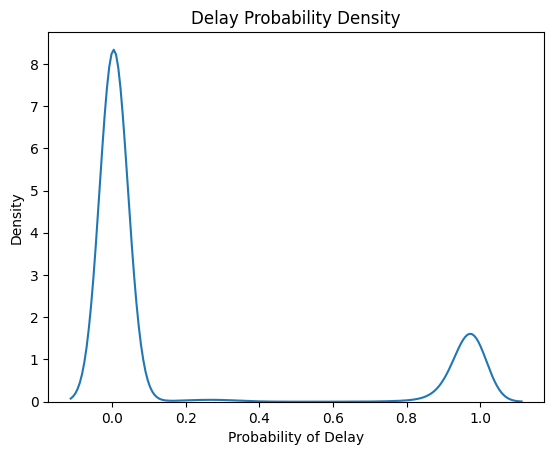

In [ ]:
import seaborn as sns

sns.kdeplot(probs_delayed)
plt.title('Delay Probability Density')
plt.xlabel('Probability of Delay')
plt.ylabel('Density')
plt.show()


# Interactive visualization:
Here we created interactive visualizations to allow users to explore the data and model predictions in more detail.



In [ ]:
import plotly.express as px

# Define a function to predict delay probabilities for a given flight number
def predict_delay(flight_num):
    # Create a subset of the data for the given flight number
    flight_data = data[data['FlightNum']==flight_num]
    # Predict the probability of delay for the given flight
    prob_delay = pipeline.predict_proba(flight_data)[:, 1]
    return prob_delay

# Create a new column for delay probability for all flights in the dataset
data['DelayProb'] = pipeline.predict_proba(data)[:, 1]

# Create an interactive scatter plot of distance vs. delay probability with flight number as a hover label
fig1 = px.scatter(data, x='Distance', y='DelayProb', hover_data=['FlightNum'])

# Create an interactive box plot of delay probability by airline
fig2 = px.box(data, x='UniqueCarrier', y='DelayProb')

# Show the interactive plots
fig1.show()
fig2.show()



The figures generated from the code can provide insights into the relationships between the variables in the dataset and the probability of a flight delay.

The histogram of delay probabilities shows the distribution of the predicted probabilities of delay for all flights in the dataset. The histogram suggests that the majority of flights have a low probability of delay, with only a small number of flights having a higher probability of delay.

The scatter plot of delay probability vs. distance suggests that there may be a relationship between the distance of a flight and the probability of delay. The plot shows that flights with a longer distance tend to have a slightly higher probability of delay, although there is still a wide range of probabilities for all distances.

The box plot of delay probability by airline suggests that there may be differences in the delay probabilities across different airlines. The plot shows that some airlines have a higher median delay probability than others, and there is also variability in the range of probabilities across airlines.

The KDE plot of delay probabilities shows the smoothed distribution of the predicted probabilities of delay. The plot suggests that the distribution is approximately normal, with a peak around 0.05 and a long tail of higher probabilities.

These figures can help us better understand the relationships between the variables in the dataset and the probability of a flight delay, which can inform further analysis or modeling.

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Train and fit your model
model = RandomForestClassifier()

# Save the model to a file
joblib.dump(model, 'flight_delay_prediction_model.joblib')


# Load the model from the file
model = joblib.load('flight_delay_prediction_model.joblib')

from flask import Flask, render_template, request
import pandas as pd
import joblib

app = Flask(__name__)
model = joblib.load('flight_delay_prediction_model.joblib')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get user input from form
    flight_details = request.form.to_dict()
    input_df = pd.DataFrame(flight_details, index=[0])

    # Preprocess the input data
    input_df['Distance'] = pd.to_numeric(input_df['Distance'])
    input_df['DepHour'] = pd.to_datetime(input_df['DepTime'], format='%H%M').dt.hour

    # Make prediction using the trained model
    prediction = model.predict_proba(input_df)[:,1][0]

    # Render the prediction result in the template
    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
